<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/Perceptron_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data into google drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linear.data to linear.data


Load numpy for matrix support, matplotlib to plot the data points and boundary layer.
Separate data into classes and extract parameters.

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

#load the data set
data = loadtxt('linear.data')

#separate the input from the output
X = data[:, 0: -1]
Y = data[:, -1]
N, d = X.shape

#separate the positive form the negative
positive_class = X[Y == 1., :]
negative_class = X[Y == -1., :]

Define a function to plot the data here and reuse it later when we have defined a hypothesis.

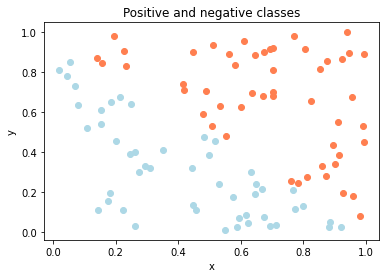

the classes look linearly separable


In [ ]:
#plot of the points
def show_the_data(x, y, more=False, z = 0):
  plt.scatter(x[:, 0], x[:, 1], c='coral')
  plt.scatter(y[:, 0], y[:, 1], c='lightblue')

  if more == True:
    plt.plot(z[:, 0], z[:, 1], c='purple', linestyle='-')

  plt.title('Positive and negative classes')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()


show_the_data(positive_class, negative_class)
print("the classes look linearly separable")

Now that we have seen that the data is linearly separable, we need to build the learning loop. We define basic functions to update weights and bias depending on predictions and output the result.

In [ ]:
#learning rate
n = 0.1
#bias
b = 0
#weight vector
w = zeros(d)

epoch = 6

def fw_func(w, x, b):
  return sign(dot(w, x) + b)

def update_weights(n, x, y, fw):
  return dot(dot(n, (y - fw)), x)

def update_bias(n, y, fw):
  return dot(n, (y - fw))

#main loop : cycle for i epochs
for i in range(0, epoch):
  #for each xi in X set
  for xi in range(0, len(X)):
        
    #predictions
    fw = fw_func(w, X[xi], b)
    
    #update the weights and bias
    w += update_weights(n, X[xi], Y[xi], fw)
    b += update_bias(n, Y[xi], fw)

  if i%(epoch/5) == 1: #output every 5 loops
    print("weights : " + str(w) + " | bias : " + str(b))

weights : [0.48526328 0.53277328] | bias : -0.5


We now use the weight and bias to define the slope and y_intercept of the hypothesis and plot it on a graph

In [ ]:
#math time : https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
# slope = -(b / w2) / (b / w1)
# y-intercept = -b / w2
# y = (-(b / w2) / (b / w1))x + (-b / w2)

def hyperplane(w, x, b, xpoints):

  w1 = w[0]
  w2 = w[1]
  slope = (-b / w2) / (b / w1)
  y_intercept = -b / w2
  y = slope * xpoints + y_intercept
  xy = stack((xpoints, y), axis = 1)


  return xy

# show_the_data(positive_class, negative_class)
points = linspace(0, 1, 100)
sep_line = hyperplane(w, X, b, points)

# sep_line

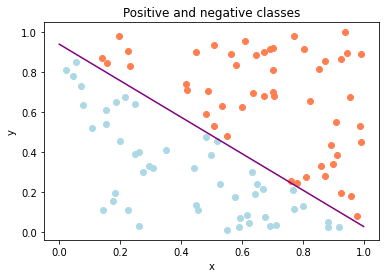

In [ ]:
show_the_data(positive_class, negative_class, True, sep_line)

Accuracy validation : we compute all predictions Ypred from X and compare to Y (true classes)

Error margin in progress.

In [ ]:
def error_margin(w, b, x, y):
  inside = w.T * x + b
  return dot(y, inside)


error_margin(w, b, X, Y) #seems wrong, we should have one list of positive or negative values for each sample

array([5.95702593, 9.31934576])